In [1]:
import pandas as pd
import matplotlib as mplstyle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
schools = pd.read_csv('FL_elementaries.csv')

In [4]:
schools.head()

,year,total_enrollment,school,pinellas_flag,percent_pre_kinder_ready,percent_passing_reading,percent_passing_math,percent_free_lunch,percent_black_enrollment,majority_free_lunch_flag,majority_black_enrollment_flag,district,FF_school_flag
0,2014,549,LAKEWOOD ELEMENTARY SCHOOL,True,62.0,19.0,15.0,0.688525,0.817851,True,True,PINELLAS,True
1,2014,410,MELROSE ELEMENTARY SCHOOL,True,51.0,13.0,7.0,0.807317,0.858537,True,True,PINELLAS,True
2,2014,591,CAMPBELL PARK ELEMENTARY SCHOOL,True,48.0,24.0,20.0,0.729272,0.817259,True,True,PINELLAS,True
3,2014,632,FAIRMOUNT PARK ELEMENTARY SCHL,True,47.0,14.0,9.0,0.770570,0.851266,True,True,PINELLAS,True
4,2014,510,MAXIMO ELEMENTARY SCHOOL,True,66.0,22.0,11.0,0.621569,0.794118,True,True,PINELLAS,True


In [5]:
schools.dtypes

year                                int64
total_enrollment                    int64
school                             object
pinellas_flag                        bool
percent_pre_kinder_ready          float64
percent_passing_reading           float64
percent_passing_math              float64
percent_free_lunch                float64
percent_black_enrollment          float64
majority_free_lunch_flag             bool
majority_black_enrollment_flag       bool
district                           object
FF_school_flag                     object
dtype: object

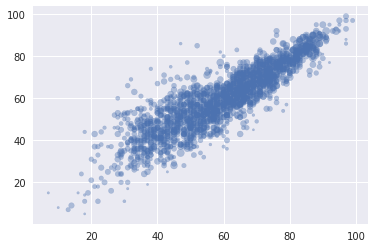

In [14]:
g  = plt.scatter(\
            x=schools['percent_passing_reading'], 
            y=schools['percent_passing_math'], 
            #size
                 s=schools['total_enrollment']/20, 
            #opacity
                 alpha=0.4)


## Scatterplots show relationships
Let's look, for 


## Seaborn gives us facet grids!

## Pairplots show *many* relationships

## Facetgrids — what does breaking it out show us?

## Filter 

In [ ]:
##